In [17]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

import imblearn
from imblearn.over_sampling import SMOTE

from collections import Counter
from typing import Union, List
import joblib

import warnings
warnings.filterwarnings(action='ignore')

## load data

In [19]:
df = pd.read_csv('scaled_train.csv')
tdf = pd.read_csv('scaled_test.csv')

In [20]:
df.columns

Index(['cat_OTHERS', 'cat_OWN', 'cat_RENT', 'cat_credit_card',
       'cat_debt_consolidation', 'cat_educational', 'cat_home_improvement',
       'cat_house', 'cat_major_purchase', 'cat_medical', 'cat_moving',
       'cat_other', 'cat_renewable_energy', 'cat_small_business',
       'cat_vacation', 'cat_wedding', 'loan_amnt', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'verification_status',
       'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util',
       'collections_12_mths_ex_med', 'application_type', 'dti_joint',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'mths_since_recent_inq',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'is_after_2015',
       'is_after_2012', 'fico_avg', 'all_util_log', 'annual_inc_log',
       'annual_inc_joint_log', 'bc_open_to_buy_log', 'delinq_amnt_log',
       'dti_log', 'max_bal_bc_log', 'mo_sin_old_il_acct_log',
       'mo_sin_old_rev_tl_op_log', 

In [21]:
print(df.shape)
df_y = df['loan_status']
df_X = df.drop(columns=['recovery_rate', 'loan_status', 'total_loan_amnt', 'row_loan_amnt'])
origin_train_df = df.copy()

(1131682, 89)


In [23]:
df_X.columns
df_X.shape

(1131682, 85)

## Design Matrix

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 30)

#smote oversample
smote = SMOTE(random_state = 30)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Fitting

In [25]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Logistic Regression - Lasso penalty

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, 
from sklearn.datasets import make_classification

# LogisticRegression 설정
logreg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)

# 파라미터 그리드 설정
param_grid = {'C': [0.1, 1.0, 10.0]}

# Stratified K-Fold 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=cv, refit=True)

# 모델 학습
grid_search.fit(X_train, y_train)

# 각 폴드별로 모델 저장
cv_models = []
for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    logreg_fold = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, C=grid_search.best_params_['C'])
    logreg_fold.fit(X_train_fold, y_train_fold)
    cv_models.append(logreg_fold)

# 각 폴드별 모델 확인
for i, model in enumerate(cv_models):
    print(f"Model for fold {i+1}: {model}")

# 베스트 모델 확인
best_model = grid_search.best_estimator_
print(f"Best model: {best_model}")



In [ ]:
cv_models

In [37]:
clfLasso = LogisticRegressionCV(penalty='l1', solver = 'saga').fit(X_train, y_train)

In [38]:
y_pred_Lasso = clfLasso.predict(X_test)
joblib.dump(clfLasso, 'clfLasso_final.pkl')
print(classification_report(y_test, y_pred_Lasso))

              precision    recall  f1-score   support

           0       0.87      0.68      0.77    180654
           1       0.33      0.61      0.42     45683

    accuracy                           0.67    226337
   macro avg       0.60      0.65      0.60    226337
weighted avg       0.76      0.67      0.70    226337



Text(0.5, 1.0, 'ROC Curve : Logistic Regression + LASSO penalty')

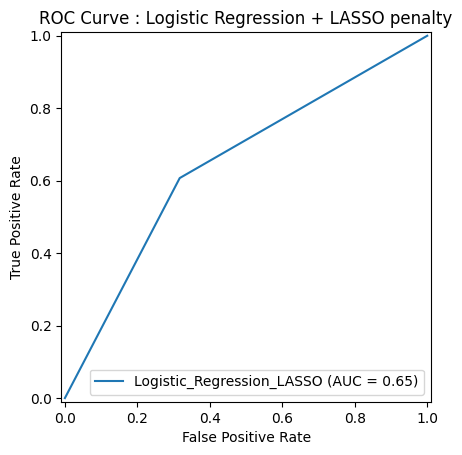

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_Lasso)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='Logistic_Regression_LASSO')
display.plot()
plt.title('ROC Curve : Logistic Regression + LASSO penalty')

### Logistic Regression - Ridge penalty

In [28]:
# LogisticRegression 설정
clfRidge = LogisticRegression(solver='liblinear', penalty='l2', max_iter=1000)

# 파라미터 그리드 설정
param_grid = {'C': [0.1, 1.0, 10.0]}

# Stratified K-Fold 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=clfRidge, param_grid=param_grid, cv=cv, refit=True)

# 모델 학습
grid_search.fit(X_train, y_train)

# 각 폴드별로 모델 및 데이터를 저장
cv_models_data = []
for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    clfRidge_fold = LogisticRegression(solver='liblinear', penalty='l2', max_iter=1000, C=grid_search.best_params_['C'])
    clfRidge_fold.fit(X_train_fold, y_train_fold)
    
    fold_data = {
        'model': clfRidge_fold,
        'X_train_fold': X_train_fold,
        'y_train_fold': y_train_fold,
        'X_test_fold': X_test_fold,
        'y_test_fold': y_test_fold
    }
    cv_models_data.append(fold_data)

# 베스트 모델 확인
best_model = grid_search.best_estimator_

Model for fold 1: LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')
X_train_fold for fold 1:
         cat_OTHERS  cat_OWN  cat_RENT  cat_credit_card  \
0             False    False      True            False   
1             False    False      True            False   
2             False    False     False            False   
3             False    False      True             True   
4             False    False      True            False   
...             ...      ...       ...              ...   
1444681       False     True      True            False   
1444682       False     True     False             True   
1444683       False    False      True             True   
1444684       False     True      True             True   
1444685       False    False      True             True   

         cat_debt_consolidation  cat_educational  cat_home_improvement  \
0                          True            False                 False   
1                          True        

In [36]:
for i in range(0, 5) :
    y_pred = cv_models_data[i]['model'].predict(cv_models_data[i]['X_test_fold'])
    y_true = cv_models_data[i]['y_test_fold']
    origin_train_df = 


In [39]:
RISK_FREE = 1.04

def get_expected_train_roe(y_pred, y_true) :
    equity = np.sum(origin_train_df.loc[:,'loan_amnt'])
    earning = np.sum(origin_train_df.loc[np.where((y_pred==0)&(y_true==0))]['total_loan_amnt'])
    recovered = np.sum(origin_train_df.loc[np.where((y_pred==0)&(y_true==1))]['total_loan_amnt']*origin_train_df.loc[np.where((y_pred==0)&(y_true==1))]['recovery_rate'])
    risk_free = np.sum(origin_train_df.loc[np.where(y_pred==1)]['total_loan_amnt'])*RISK_FREE
    return (earning+recovered+risk_free)/equity

def get_expected_test_roe(y_pred, y_true):
    equity = np.sum(origin_test_df.loc[:,'loan_amnt'])
    earning = np.sum(origin_test_df.loc[np.where((y_pred==0)&(y_true==0))]['total_loan_amnt'])
    recovered = np.sum(origin_test_df.loc[np.where((y_pred==0)&(y_true==1))]['total_loan_amnt']*origin_test_df.loc[np.where((y_pred==0)&(y_true==1))]['recovery_rate'])
    risk_free = np.sum(origin_test_df.loc[np.where(y_pred==1)]['total_loan_amnt'])*RISK_FREE
    return (earning+recovered+risk_free)/equity

In [40]:
#origin_train_df['y_pred'] = 
get_expected_train_roe(cv_pred_y_Ridge, cv_models_data[0]['y_test_fold'])

-5.372990472148112e+19

In [88]:
clfRidge = RidgeClassifierCV().fit(X_train, y_train)

In [89]:
y_pred_Ridge = clfRidge.predict(X_test)
joblib.dump(clfRidge, 'clfRidge_final.pkl')
print(classification_report(y_test, y_pred_Ridge))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82    180654
           1       0.36      0.45      0.40     45683

    accuracy                           0.73    226337
   macro avg       0.60      0.62      0.61    226337
weighted avg       0.75      0.73      0.74    226337



Text(0.5, 1.0, 'ROC Curve : Logistic Regression + Ridge penalty')

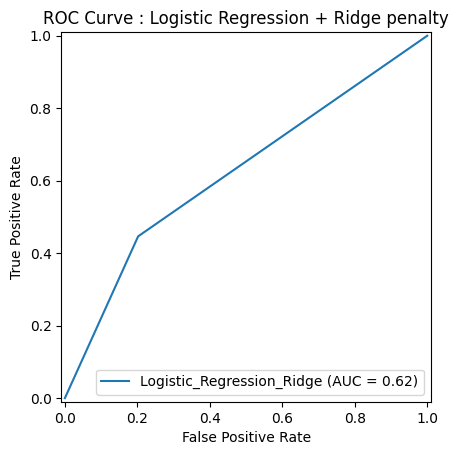

In [90]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_Ridge)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Logistic_Regression_Ridge')
display.plot()
plt.title('ROC Curve : Logistic Regression + Ridge penalty')

### RandomForest

In [36]:
RF_para = {'max_depth':[5, 10, 20, 35, 50, 100, 150, 200, None], 
           'max_features':['log2', 'sqrt', None], 
           'n_estimators':[15, 30, 60, 100, 200]}

clfRF = RandomForestClassifier(random_state = 30)
clfRF_grid = GridSearchCV(clfRF, RF_para, cv = 5, refit = True)

clfRF_grid.fit(X_train, y_train)
clfRF = clfRF_grid.best_estimator_
print(clfRF_grid.best_score_, clfRF_grid.best_params_)

KeyboardInterrupt: 

In [ ]:
y_pred_RF = clfRF.predict(X_test)
joblib.dump(clfRF, 'clfRF_final.pkl')
print(classification_report(y_test, y_pred_RF))

In [ ]:
confusion_matrix(y_test, y_pred_RF)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RF)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'RandomForestClassifier')
display.plot()
plt.title('ROC Curve : RandomForestClassifier')

In [ ]:
clfRF.predict_proba(X_test)

### XGBoost

In [ ]:
xgB_para = {'n_estimators' : [100, 200, 300, 400, 500, None], 
           'learning_rate' : [0.01, 0.1],
           'max_depth' : [3, 5, 7, 10, 15, None],
           'gamma' : [0, 1, 2],
           'colsample_bytree' : [0.8, 0.9]}

clfxgB = XGBClassifier(seed = 30)
clfxgB_grid = GridSearchCV(clfRF, RF_para, cv = 5, refit = True)

clfxgB_grid.fit(X_train, y_train)
clfxgB = clfxgB_grid.best_estimator_
print(clfxgB_grid.best_score_, clfxgB_grid.best_params_)

In [ ]:
y_pred_xgB = clfxgB.predict(X_test)
joblib.dump(clfxgB, 'clfXGB_final.pkl')
print(classification_report(y_test, y_pred_xgB))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xgB)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'XGBClassifier')
display.plot()
plt.title('ROC Curve : XGBClassifier')

## Scoring Function : ROE

In [ ]:
dft = pd.read_csv('scaled_test.csv')
dft_y = dft['loan_status']
dft_X = dft.drop(columns = ['loan_status'])

In [56]:
def my_custom_roe(df):
    for i in range(0, len(df)) :
        equity, returns = 0, 0
        if df.iloc[i, 'loan_status'] == 0 and df.iloc[i, 'y_pred'] == 0 :
            equity += df.iloc[i, 'total_loan_amnt']
            returns += df.iloc[i, 'total_loan_amnt'] * (1 + df.iloc[i, 'int_rate'])
        elif df.iloc[i, 'loan_status'] == 0 and df.iloc[i, 'y_pred'] == 1 :
            equity += df.iloc[i, 'total_loan_amnt']
            returns += df.iloc[i, 'total_loan_amnt'] * df.iloc['recovery_rate'] * (1 + df.iloc[i, 'int_rate'])
        else :
            equity += df.iloc[i, 'total_loan_amnt']
            returns += df.iloc[i, 'total_loan_amnt'] * 1.03
    return returns/equity

In [ ]:
clfXGB.predict_proba(X_test)

In [ ]:
tX_vaild, tX_test, ty_vaild, ty_test = train_test_split(dft_X, dft_y, test_size = 0.2, random_state = 30)

In [ ]:
ty_pred_Ridge = clfRidge.fit(tX_vaild)
tX_vaild['y_pred'] = ty_pred_Ridge

roeRidge = my_custom_roe(tX_vaild)

In [86]:
RISK_FREE = 1.04

def get_expected_train_roe(y_pred, y_true) :
    #equity = 
    earning = np.sum(origin_train_df.loc[np.where((y_pred==0)&(y_true==0))]['total_loan_amnt'])
    recovered = np.sum(origin_train_df.loc[np.where((y_pred==0)&(y_true==1))]['total_loan_amnt']*origin_train_df.loc[np.where((y_pred==0)&(y_true==1))]['recovery_rate'])
    risk_free = np.sum(origin_train_df.loc[np.where(y_pred==1)]['total_loan_amnt'])*RISK_FREE
    return earning+recovered+risk_free

def get_expected_test_roe(y_pred, y_true):
    equity = np.sum(origin_test_df.loc[:,'loan_amnt'])
    earning = np.sum(origin_test_df.loc[np.where((y_pred==0)&(y_true==0))]['total_loan_amnt'])
    recovered = np.sum(origin_test_df.loc[np.where((y_pred==0)&(y_true==1))]['total_loan_amnt']*origin_test_df.loc[np.where((y_pred==0)&(y_true==1))]['recovery_rate'])
    risk_free = np.sum(origin_test_df.loc[np.where(y_pred==1)]['total_loan_amnt'])*RISK_FREE
    return (earning+recovered+risk_free)/equity

In [62]:
origin_train_df

,cat_OTHERS,cat_OWN,cat_RENT,cat_credit_card,cat_debt_consolidation,cat_educational,cat_home_improvement,cat_house,cat_major_purchase,cat_medical,...,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log,total_loan_amnt,loan_status,recovery_rate
0,False,False,False,False,True,False,False,False,False,False,...,-1.300342,-0.184875,0.606765,0.347228,1.220188,0.082806,0.117392,0.407071,0,0.098254
1,False,False,False,False,False,False,False,False,False,False,...,0.015749,-0.168609,0.919082,0.242268,-0.524523,0.248964,0.254213,-0.078083,0,1.000000
2,False,False,False,False,True,False,False,False,False,False,...,0.746053,0.807409,1.308046,-0.008287,0.576267,0.729980,-0.059571,1.761025,0,1.000000
3,False,False,False,False,True,False,False,False,False,False,...,-0.595743,0.109304,0.937894,0.525547,-0.524523,0.289020,0.469424,-0.947660,0,1.000000
4,False,False,False,False,False,False,False,False,True,False,...,-0.595743,0.492070,1.185470,0.293678,-0.524523,0.564827,0.252479,-0.804666,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320673,False,False,False,False,True,False,False,False,False,False,...,0.683804,0.568863,1.155430,0.556758,0.576267,0.567661,0.361127,2.712040,0,1.000000
320674,False,True,False,False,True,False,False,False,False,False,...,-1.882301,-0.152906,0.947681,-0.428563,1.220188,0.283007,-0.552725,-1.267304,1,0.460877
320675,False,False,True,True,False,False,False,False,False,False,...,-0.266979,0.408189,1.124044,0.445305,1.220188,0.570736,0.354115,0.593324,0,1.000000
320676,False,False,False,False,True,False,False,False,False,False,...,-0.168280,0.524645,1.127411,0.764910,-0.524523,0.585170,0.531280,2.122546,0,1.000000


In [61]:


get_expected_train_roe(y_pred_Ridge, y_test)

0.0

In [80]:
origin_test_df = pd.read_csv("scaled_test.csv")

X_ftest = origin_test_df.drop(columns = ['loan_status'])
y_ftest = origin_test_df['loan_status']

X_ftest_drop = X_ftest.drop(columns = ['recovery_rate', 'total_loan_amnt'])

y_pred_Ridge = clfRidge.predict(X_ftest_drop)

In [87]:
get_expected_test_roe(y_pred_Ridge, y_ftest)

0.993588088466099

In [ ]:


origin_train_df = pd.read_csv("scaled_train.csv")
origin_test_df = pd.read_csv("scaled_test.csv")

